In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
df_dupr = pd.read_csv("../docs/PickleBallDUPRs.csv")

In [38]:
df_dupr["singles_dupr"].loc[df_dupr.singles_dupr=="NR"] = np.nan
df_dupr["singles_dupr"]=df_dupr.singles_dupr.astype("float")

<Axes: ylabel='Density'>

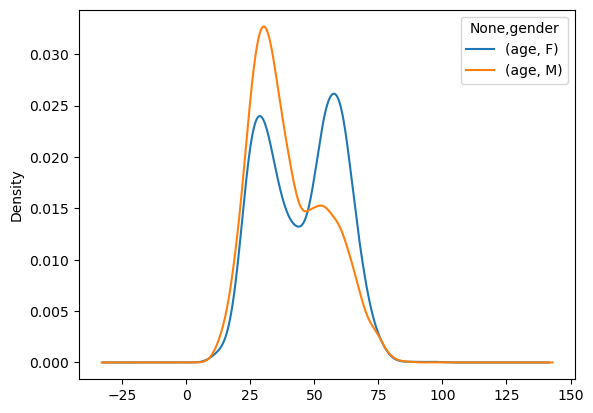

In [108]:
df_dupr[[(x < 100) and (x>10) for x in df_dupr.age]].pivot(columns="gender",values=["age"]).plot.kde()

In [221]:
df_dupr[["singles_dupr","doubles_dupr"]].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [67]:
df_dupr[["doubles_dupr"]].quantile([.01*x for x in range(0,101)],method="table",interpolation="nearest")

TypeError: Series.quantile() got an unexpected keyword argument 'method'

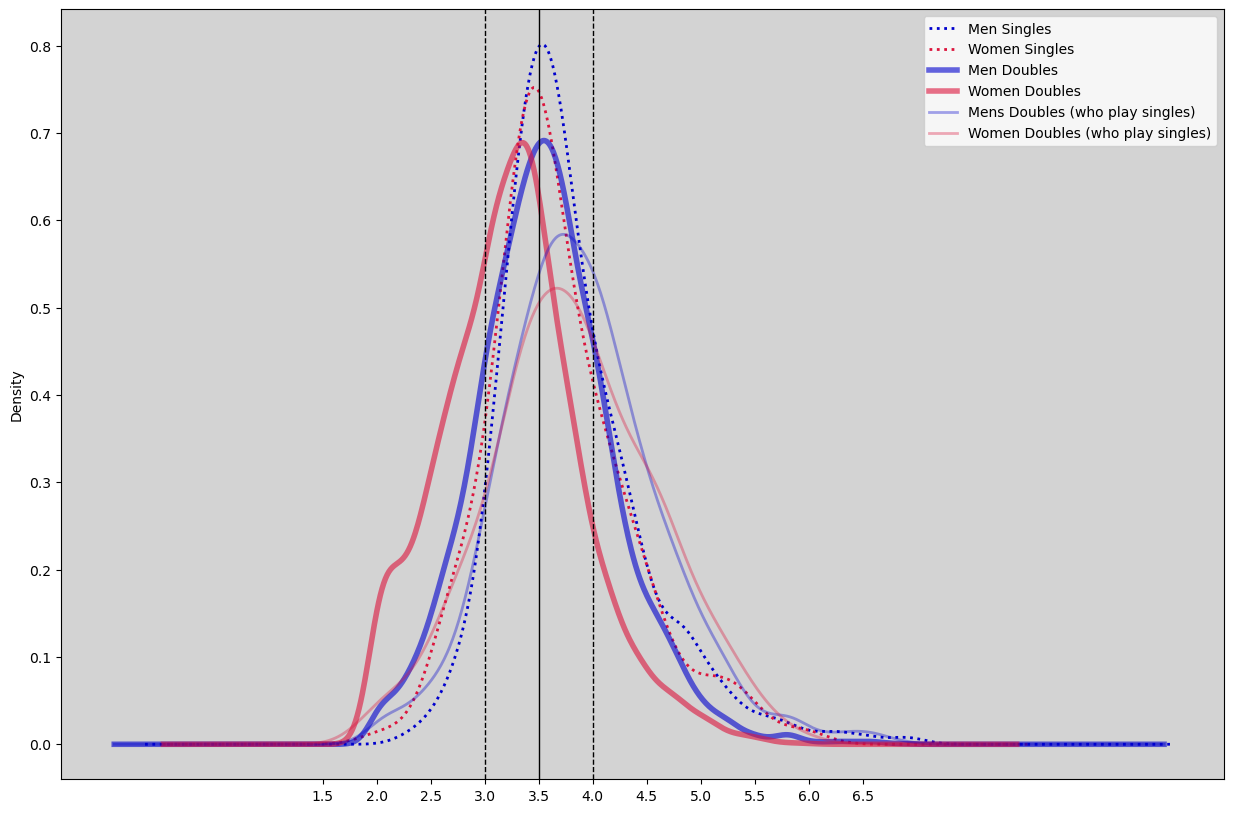

In [217]:
dm=df_dupr[df_dupr.gender == "M"].doubles_dupr
df=df_dupr[df_dupr.gender == "F"].doubles_dupr
sm=df_dupr[df_dupr.gender == "M"].singles_dupr.astype("float")
sf=df_dupr[df_dupr.gender == "F"].singles_dupr.astype("float")
dms=df_dupr.loc[df_dupr.gender=="M"][lambda x:pd.notna(x.singles_dupr)]["doubles_dupr"]
dfs=df_dupr.loc[df_dupr.gender=="F"][lambda x:pd.notna(x.singles_dupr)]["doubles_dupr"]
df = pd.DataFrame({"Men Doubles":dm,"Women Doubles":df,"Men Singles":sm,"Women Singles":sf, \
                   "Men Doubles w/ Singles":dms,"Women Doubles w/ Singles":dfs})

df["Men Singles"].plot.kde(color="mediumblue",linewidth=2,linestyle=":",figsize=(15,10))
df["Women Singles"].plot.kde(color="crimson",linewidth=2,linestyle=":")

df["Men Doubles"].plot.kde(color="mediumblue",linewidth=4,alpha=.6)
df["Women Doubles"].plot.kde(color="crimson",linewidth=4,alpha=.6)

df["Men Doubles w/ Singles"].plot.kde(color="mediumblue",linewidth=2,alpha=.35)
df["Women Doubles w/ Singles"].plot.kde(color="crimson",linewidth=2,alpha=.35).set_facecolor("lightgrey")

plt.legend(["Men Singles","Women Singles","Men Doubles","Women Doubles","Mens Doubles (who play singles)","Women Doubles (who play singles)"])
plt.xticks([1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])

plt.axvline(x=3.0, color='black',linewidth=1,linestyle="--")
plt.axvline(x=3.5, color='black',linewidth=1)
plt.axvline(x=4.0, color='black',linewidth=1,linestyle="--")
plt.show(block=True)